### Time Series Study From the first-cases-discovered day  --Bianca 21st,May,2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data loading
df = pd.read_csv('time_series_covid19_confirmed_global.csv', index_col = 1, 
                parse_dates = True, infer_datetime_format = True)
# drop useless cols : 'Province/State', 'Lat', 'Long 
df= df.drop(columns=['Province/State', 'Lat', 'Long'], axis = 1)
# transpose data so that countries will be columns and every row in dates.
dfTrans = df.transpose() 
# rename index name
dfTrans.index.name = 'Dates'
# Since one country like Australia may have more than one region, we sum up all the cases for each country.
dfSum = dfTrans.groupby(dfTrans.columns, axis=1).sum()
'''
dfSum.shape #:(117, 188)
dfSum.columns 
Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=188)'''
# For simplify, I only chose 10 countries to draw the trend, u can change the countries range here :)
dfTen = dfSum[['Brazil', 'Canada', 'China','Germany', 'Italy', 'Korea, South', 'Malaysia', 'Singapore']]
#'Australia','Brazil','Burma', 'Canada', 'China', 'Diamond Princess', 'Denmark', 'Finland', 'France', 'Germany', 'India', 'Indonesia', 'Iran', 'Italy', 'Japan', 'Korea, South', 'Malaysia', 'New Zealand', 'Norway', 'Philippines', 'Russia', 'Singapore', 'Spain', 'Sweden', 'Taiwan*','Thailand', 'United Arab Emirates', 'United Kingdom', 'US', 'Vietnam']]
dfTen.head()

Country/Region,Brazil,Canada,China,Germany,Italy,"Korea, South",Malaysia,Singapore
Dates,,,,,,,,
1/22/20,0,0,548,0,0,1,0,0
1/23/20,0,0,643,0,0,1,0,1
1/24/20,0,0,920,0,0,2,0,3
1/25/20,0,0,1406,0,0,2,3,3
1/26/20,0,1,2075,0,0,3,4,4


In [3]:
#copy the dataframe in case I destroy it
dfTenShift = dfTen
# Get when this coutry actually got cases with not-zero values
# by counting how many zeros in this column totally
countZero = dfTenShift.apply(lambda x : x.value_counts().get(0,0))
# run a loop in all columns
for index, row in dfTenShift.iteritems():
    # if this country have 3 zero then it will up-shift 3
    dfTenShift.loc[:,index] = dfTenShift.loc[:,index].shift(-countZero[index])
#Testing #dfTenc.loc[:,'Brazil'].shift(-countZero['Brazil'])
#reindex the dates
dfTenShift = dfTenShift.reset_index(drop=True)
dfTenShift.head()

/Users/margret/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Country/Region,Brazil,Canada,China,Germany,Italy,"Korea, South",Malaysia,Singapore
0,1.0,1.0,548,1.0,2.0,1,3.0,1.0
1,1.0,1.0,643,4.0,2.0,1,4.0,3.0
2,1.0,2.0,920,4.0,2.0,2,4.0,3.0
3,2.0,2.0,1406,4.0,2.0,2,4.0,4.0
4,2.0,2.0,2075,5.0,2.0,3,7.0,5.0


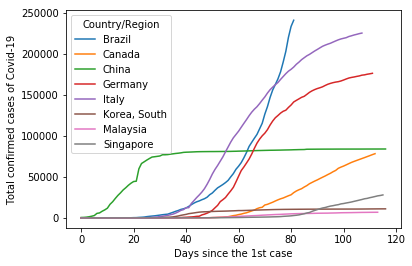

In [4]:
dfTenShift.plot()
plt.xlabel('Days since the 1st case')
plt.ylabel('Total confirmed cases of Covid-19')
plt.show()

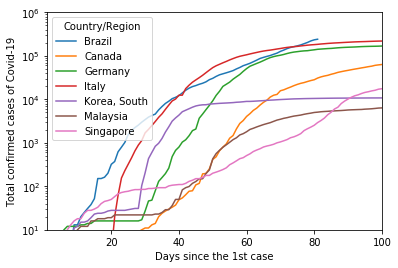

In [5]:
# y-logarithmic coordinates
# I removed China because the first day is already 500 not good to compare
dfLog = dfTenShift[['Brazil', 'Canada','Germany', 'Italy', 'Korea, South', 'Malaysia', 'Singapore']]

dfLog.plot()
# introduce y-logarithmic setting
plt.yscale('log')
# feel free the adjust the range
plt.xlim(1, 100)
plt.ylim(10, 1e6)
plt.xlabel('Days since the 1st case')
plt.ylabel('Total confirmed cases of Covid-19')
plt.show()

In [6]:
# based on my dfTenShift dataframe I calculate the number of 
dfDiff = dfTenShift.astype('float').diff(1).dropna()
dfDiff.head()

Country/Region,Brazil,Canada,China,Germany,Italy,"Korea, South",Malaysia,Singapore
1,0.0,0.0,95.0,3.0,0.0,0.0,1.0,2.0
2,0.0,1.0,277.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,486.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,669.0,1.0,0.0,1.0,3.0,1.0
5,0.0,2.0,802.0,3.0,0.0,1.0,1.0,2.0


Text(0,0.5,'Daily new cases of Covid-19')

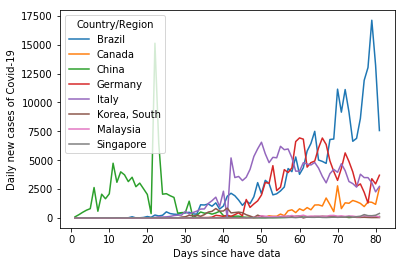

In [8]:
dfDiff.plot()
plt.xlabel('Days since have data')
plt.ylabel('Daily new cases of Covid-19')

### Asean Region

In [9]:
dfAsean = dfSum[[ 'Burma','Brunei','Cambodia','Indonesia','Laos','Malaysia','Philippines','Singapore','Thailand','Vietnam']]

In [10]:
dfAseanShift = dfAsean
# Get when this coutry actually got cases with not-zero values
# by counting how many zeros in this column totally
countZeroAsean = dfAseanShift.apply(lambda x : x.value_counts().get(0,0))
# run a loop in all columns
for index, row in dfAseanShift.iteritems():
    # if this country have 3 zero then it will up-shift 3
    dfAseanShift.loc[:,index] = dfAseanShift.loc[:,index].shift(-countZeroAsean[index])
#Testing #dfTenc.loc[:,'Brazil'].shift(-countZero['Brazil'])
#reindex the dates
dfAseanShift = dfAseanShift.reset_index(drop=True)
dfAseanShift

/Users/margret/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Country/Region,Burma,Brunei,Cambodia,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam
0,8.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2,2.0
1,8.0,1.0,1.0,2.0,3.0,4.0,1.0,3.0,3,2.0
2,10.0,11.0,1.0,2.0,6.0,4.0,1.0,3.0,5,2.0
3,14.0,11.0,1.0,2.0,6.0,4.0,2.0,4.0,7,2.0
4,15.0,37.0,1.0,4.0,8.0,7.0,2.0,5.0,8,2.0
5,15.0,40.0,1.0,4.0,8.0,8.0,2.0,7.0,8,2.0
6,20.0,50.0,1.0,6.0,8.0,8.0,2.0,7.0,14,2.0
7,20.0,54.0,1.0,19.0,9.0,8.0,2.0,10.0,14,2.0
8,21.0,56.0,1.0,27.0,10.0,8.0,3.0,13.0,14,2.0
9,21.0,68.0,1.0,34.0,10.0,8.0,3.0,16.0,19,6.0


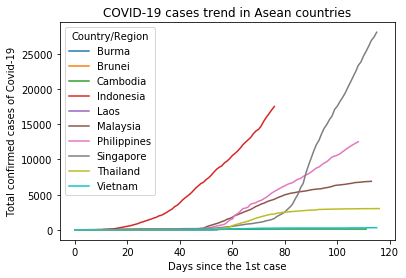

In [11]:
dfAseanShift.plot()
plt.title('COVID-19 cases trend in Asean countries')
plt.xlabel('Days since the 1st case')
plt.ylabel('Total confirmed cases of Covid-19')
plt.show()

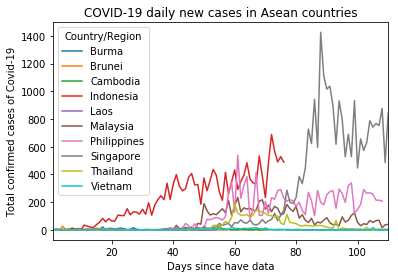

In [12]:
dfAseanDiff = dfAseanShift.astype('float').diff(1).dropna(how='all')
dfAseanDiff.plot()
plt.title('COVID-19 daily new cases in Asean countries')
plt.xlim(1,110)
plt.xlabel('Days since have data')
plt.ylabel('Total confirmed cases of Covid-19')
plt.show()

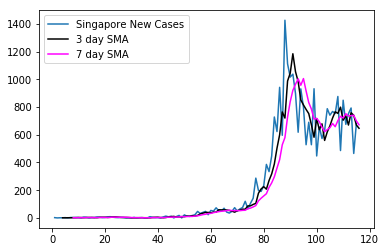

In [13]:
#Moving Average
plt.plot(dfAseanDiff.index,dfAseanDiff.Singapore, label = 'Singapore New Cases')
plt.plot(dfAseanDiff.index,dfAseanDiff.Singapore.rolling(window = 3).mean().shift(1), label='3 day SMA', color='black')
plt.plot(dfAseanDiff.index,dfAseanDiff.Singapore.rolling(window = 7).mean().shift(1), label='7 day SMA',color='magenta')
plt.legend(loc='upper left')
plt.show()